# Increase Dimensinality of Input (Implementing Fig. 5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [2]:
# True Statistics
v_mean = np.array([4, 6])
v_var = np.array([1.5, 2.0])
u_var = np.array([1.1, 1.2])
Theta_true = np.array([[1.5, 0.1], [0.1, 1.5]])

def h(v):
    return np.square(v)

def dh(v):
    return 2*v


def g(v, Theta):
    return Theta @ h(v)

def dg(v, Theta):
    return Theta @ dh(v)

In [3]:
x = np.array([1.1, 2.2])
np.expand_dims(x, 1) @ np.expand_dims(x, 0)

array([[1.21, 2.42],
       [2.42, 4.84]])

C:\Users\joeag\AppData\Local\Temp\ipykernel_12960\3604421241.py:8: RuntimeWarning: overflow encountered in square
  return np.square(v)
C:\Users\joeag\AppData\Local\Temp\ipykernel_12960\2760485290.py:28: RuntimeWarning: invalid value encountered in subtract
  eps_u += lr * (u - g(phi, Theta) - Sigma_u@eps_u)
C:\Users\joeag\AppData\Local\Temp\ipykernel_12960\2760485290.py:29: RuntimeWarning: invalid value encountered in subtract
  eps_p += lr * (phi - v_p - Sigma_p@eps_p)


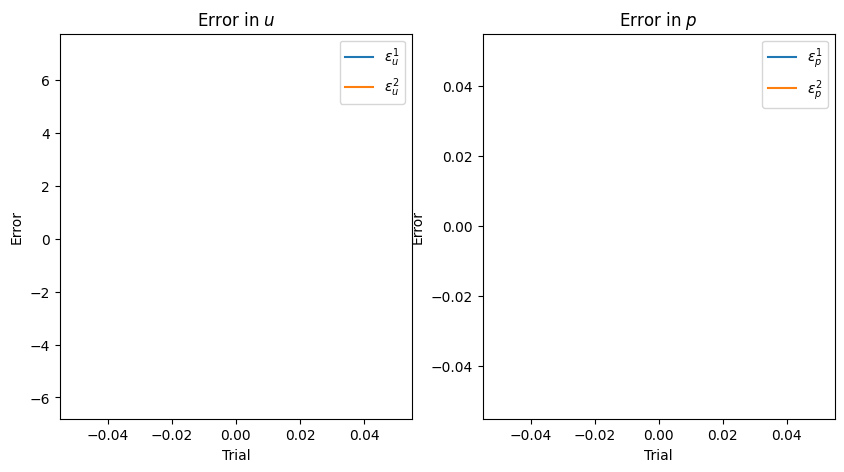

In [4]:
# def simulate_learning(num_trials=10000, max_t=5, dt=0.01, lr=0.01):
    # Learnable Parameters, Initialised in lists for tracking
v_p = np.array([1.0,1.])
Sigma_p = np.eye(2)
Sigma_u = np.eye(2)
Theta = np.ones((2,2)) * 0.1

num_trials = 10000
lr = 0.01
max_t = 5
dt = 0.01

eps_us = np.zeros((num_trials, 2))
eps_ps = np.zeros((num_trials, 2))

for i in range(num_trials):

    # Sample cause 'v' and its observation 'u'
    v = np.random.normal(v_mean, np.sqrt(v_var))
    u = np.random.normal(g(v, Theta_true), np.sqrt(u_var))

    phi = v_p
    eps_u = np.zeros(2)
    eps_p = np.zeros(2)

    for _ in range(int(max_t / dt)):
        phi += lr * (-eps_p + dh(phi) * Theta.T @ eps_u)
        eps_u += lr * (u - g(phi, Theta) - Sigma_u@eps_u)
        eps_p += lr * (phi - v_p - Sigma_p@eps_p)
    
    eps_us[i] = eps_u
    eps_ps[i] = eps_p

    
    Sigma_u += lr * 0.5 * (np.expand_dims(eps_u, 1) @ np.expand_dims(eps_u, 0) - np.linalg.inv(Sigma_u))
    v_p +=     lr * eps_p
    Sigma_p += lr * 0.5 * (np.expand_dims(eps_p, 1) @ np.expand_dims(eps_p, 0) - np.linalg.inv(Sigma_p))
    Theta += lr * np.expand_dims(eps_u, 1) @ np.expand_dims(h(phi), 0)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(eps_us[:,0], label='$\epsilon_u^1$')
plt.plot(eps_us[:,1], label='$\epsilon_u^2$')
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Error')
plt.title('Error in $u$')

plt.subplot(1,2,2)
plt.plot(eps_ps[:,0], label='$\epsilon_p^1$')
plt.plot(eps_ps[:,1], label='$\epsilon_p^2$')
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Error')
plt.title('Error in $p$')

plt.show()

In [49]:
Sigma_p

array([[1.06906573, 0.        ],
       [0.        , 1.06906573]])